# Import Library

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load Dataset

In [ ]:
df=pd.read_csv(r"https://raw.githubusercontent.com/aminur-sarker6232/Phishing-Website-Detection/refs/heads/main/dataset_phishing.csv")

In [ ]:
df.head()

,url,length_url,length_hostname,ip,nb_dots,nb_hyphens,nb_at,nb_qm,nb_and,nb_or,...,domain_in_title,domain_with_copyright,whois_registered_domain,domain_registration_length,domain_age,web_traffic,dns_record,google_index,page_rank,status
0,http://www.crestonwood.com/router.php,37,19,0,3,0,0,0,0,0,...,0,1,0,45,-1,0,1,1,4,legitimate
1,http://shadetreetechnology.com/V4/validation/a...,77,23,1,1,0,0,0,0,0,...,1,0,0,77,5767,0,0,1,2,phishing
2,https://support-appleld.com.secureupdate.duila...,126,50,1,4,1,0,1,2,0,...,1,0,0,14,4004,5828815,0,1,0,phishing
3,http://rgipt.ac.in,18,11,0,2,0,0,0,0,0,...,1,0,0,62,-1,107721,0,0,3,legitimate
4,http://www.iracing.com/tracks/gateway-motorspo...,55,15,0,2,2,0,0,0,0,...,0,1,0,224,8175,8725,0,0,6,legitimate


In [ ]:
df[['url', 'status']]

,url,status
0,http://www.crestonwood.com/router.php,legitimate
1,http://shadetreetechnology.com/V4/validation/a...,phishing
2,https://support-appleld.com.secureupdate.duila...,phishing
3,http://rgipt.ac.in,legitimate
4,http://www.iracing.com/tracks/gateway-motorspo...,legitimate
...,...,...
11425,http://www.fontspace.com/category/blackletter,legitimate
11426,http://www.budgetbots.com/server.php/Server%20...,phishing
11427,https://www.facebook.com/Interactive-Televisio...,legitimate
11428,http://www.mypublicdomainpictures.com/,legitimate


# EDA (Exploratory Data Analysis)

### a. Understanding the Dataset

- Head of the dataset
- Shape of the data set
- Types of columns
- Information about data set
- Summary of the data set

In [ ]:
df.head()

,url,length_url,length_hostname,ip,nb_dots,nb_hyphens,nb_at,nb_qm,nb_and,nb_or,...,domain_in_title,domain_with_copyright,whois_registered_domain,domain_registration_length,domain_age,web_traffic,dns_record,google_index,page_rank,status
0,http://www.crestonwood.com/router.php,37,19,0,3,0,0,0,0,0,...,0,1,0,45,-1,0,1,1,4,legitimate
1,http://shadetreetechnology.com/V4/validation/a...,77,23,1,1,0,0,0,0,0,...,1,0,0,77,5767,0,0,1,2,phishing
2,https://support-appleld.com.secureupdate.duila...,126,50,1,4,1,0,1,2,0,...,1,0,0,14,4004,5828815,0,1,0,phishing
3,http://rgipt.ac.in,18,11,0,2,0,0,0,0,0,...,1,0,0,62,-1,107721,0,0,3,legitimate
4,http://www.iracing.com/tracks/gateway-motorspo...,55,15,0,2,2,0,0,0,0,...,0,1,0,224,8175,8725,0,0,6,legitimate


In [ ]:
df.shape

(11430, 89)

In [ ]:
df.columns

Index(['url', 'length_url', 'length_hostname', 'ip', 'nb_dots', 'nb_hyphens',
       'nb_at', 'nb_qm', 'nb_and', 'nb_or', 'nb_eq', 'nb_underscore',
       'nb_tilde', 'nb_percent', 'nb_slash', 'nb_star', 'nb_colon', 'nb_comma',
       'nb_semicolumn', 'nb_dollar', 'nb_space', 'nb_www', 'nb_com',
       'nb_dslash', 'http_in_path', 'https_token', 'ratio_digits_url',
       'ratio_digits_host', 'punycode', 'port', 'tld_in_path',
       'tld_in_subdomain', 'abnormal_subdomain', 'nb_subdomains',
       'prefix_suffix', 'random_domain', 'shortening_service',
       'path_extension', 'nb_redirection', 'nb_external_redirection',
       'length_words_raw', 'char_repeat', 'shortest_words_raw',
       'shortest_word_host', 'shortest_word_path', 'longest_words_raw',
       'longest_word_host', 'longest_word_path', 'avg_words_raw',
       'avg_word_host', 'avg_word_path', 'phish_hints', 'domain_in_brand',
       'brand_in_subdomain', 'brand_in_path', 'suspecious_tld',
       'statistical_report', 

In [ ]:
df.dtypes

,0
url,object
length_url,int64
length_hostname,int64
ip,int64
nb_dots,int64
...,...
web_traffic,int64
dns_record,int64
google_index,int64
page_rank,int64


In [ ]:
df.describe()

,length_url,length_hostname,ip,nb_dots,nb_hyphens,nb_at,nb_qm,nb_and,nb_or,nb_eq,...,empty_title,domain_in_title,domain_with_copyright,whois_registered_domain,domain_registration_length,domain_age,web_traffic,dns_record,google_index,page_rank
count,11430.000000,11430.000000,11430.000000,11430.000000,11430.000000,11430.000000,11430.000000,11430.000000,11430.0,11430.000000,...,11430.000000,11430.000000,11430.000000,11430.000000,11430.000000,11430.000000,1.143000e+04,11430.000000,11430.000000,11430.000000
mean,61.126684,21.090289,0.150569,2.480752,0.997550,0.022222,0.141207,0.162292,0.0,0.293176,...,0.124759,0.775853,0.439545,0.072878,492.532196,4062.543745,8.567566e+05,0.020122,0.533946,3.185739
std,55.297318,10.777171,0.357644,1.369686,2.087087,0.155500,0.364456,0.821337,0.0,0.998317,...,0.330460,0.417038,0.496353,0.259948,814.769415,3107.784600,1.995606e+06,0.140425,0.498868,2.536955
min,12.000000,4.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,...,0.000000,0.000000,0.000000,0.000000,-1.000000,-12.000000,0.000000e+00,0.000000,0.000000,0.000000
25%,33.000000,15.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,...,0.000000,1.000000,0.000000,0.000000,84.000000,972.250000,0.000000e+00,0.000000,0.000000,1.000000
50%,47.000000,19.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,...,0.000000,1.000000,0.000000,0.000000,242.000000,3993.000000,1.651000e+03,0.000000,1.000000,3.000000
75%,71.000000,24.000000,0.000000,3.000000,1.000000,0.000000,0.000000,0.000000,0.0,0.000000,...,0.000000,1.000000,1.000000,0.000000,449.000000,7026.750000,3.738455e+05,0.000000,1.000000,5.000000
max,1641.000000,214.000000,1.000000,24.000000,43.000000,4.000000,3.000000,19.000000,0.0,19.000000,...,1.000000,1.000000,1.000000,1.000000,29829.000000,12874.000000,1.076799e+07,1.000000,1.000000,10.000000


### b. Cleaning the Dataset

- Dropping duplicate values
- Checking NULL values
- Checking for 0 value and replacing it

In [ ]:
df = df.drop_duplicates()


In [ ]:
df.shape

(11430, 89)

In [ ]:
df.isnull().sum()

,0
url,0
length_url,0
length_hostname,0
ip,0
nb_dots,0
...,...
web_traffic,0
dns_record,0
google_index,0
page_rank,0


In [ ]:
df_persen = df.isnull().sum()/len(df)*100

In [ ]:
df_persen

,0
url,0.0
length_url,0.0
length_hostname,0.0
ip,0.0
nb_dots,0.0
...,...
web_traffic,0.0
dns_record,0.0
google_index,0.0
page_rank,0.0


In [ ]:
df.dropna()

,url,length_url,length_hostname,ip,nb_dots,nb_hyphens,nb_at,nb_qm,nb_and,nb_or,...,domain_in_title,domain_with_copyright,whois_registered_domain,domain_registration_length,domain_age,web_traffic,dns_record,google_index,page_rank,status
0,http://www.crestonwood.com/router.php,37,19,0,3,0,0,0,0,0,...,0,1,0,45,-1,0,1,1,4,legitimate
1,http://shadetreetechnology.com/V4/validation/a...,77,23,1,1,0,0,0,0,0,...,1,0,0,77,5767,0,0,1,2,phishing
2,https://support-appleld.com.secureupdate.duila...,126,50,1,4,1,0,1,2,0,...,1,0,0,14,4004,5828815,0,1,0,phishing
3,http://rgipt.ac.in,18,11,0,2,0,0,0,0,0,...,1,0,0,62,-1,107721,0,0,3,legitimate
4,http://www.iracing.com/tracks/gateway-motorspo...,55,15,0,2,2,0,0,0,0,...,0,1,0,224,8175,8725,0,0,6,legitimate
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11425,http://www.fontspace.com/category/blackletter,45,17,0,2,0,0,0,0,0,...,0,0,0,448,5396,3980,0,0,6,legitimate
11426,http://www.budgetbots.com/server.php/Server%20...,84,18,0,5,0,1,1,0,0,...,1,0,0,211,6728,0,0,1,0,phishing
11427,https://www.facebook.com/Interactive-Televisio...,105,16,1,2,6,0,1,0,0,...,0,0,0,2809,8515,8,0,1,10,legitimate
11428,http://www.mypublicdomainpictures.com/,38,30,0,2,0,0,0,0,0,...,1,0,0,85,2836,2455493,0,0,4,legitimate


In [ ]:
df.shape

(11430, 89)

In [ ]:
df['status'].value_counts()

,count
status,
legitimate,5715
phishing,5715


<Axes: xlabel='status', ylabel='count'>

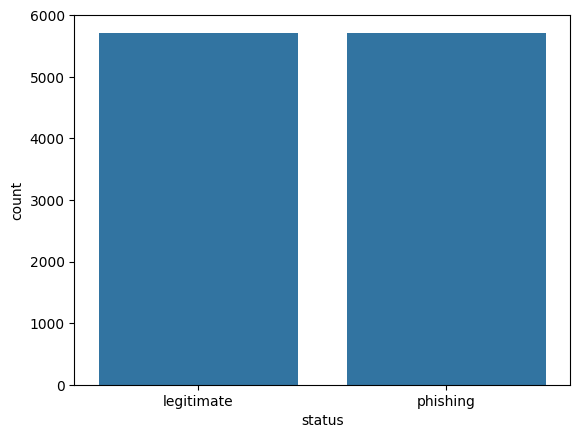

In [ ]:
sns.countplot(x="status",data=df)

### Outlier Detection

In [ ]:
numerical_columns = df.select_dtypes(include=['int64' , 'float64']).columns

for column in numerical_columns:
  q1 = df[column].quantile(0.25)
  q3 = df[column].quantile(0.75)
  iqr = q3 - q1
  lower_bound = q1 - 1.5 * iqr
  upper_bound = q3 + 1.5 * iqr
  df_outlier = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
df_outlier

,url,length_url,length_hostname,ip,nb_dots,nb_hyphens,nb_at,nb_qm,nb_and,nb_or,...,domain_in_title,domain_with_copyright,whois_registered_domain,domain_registration_length,domain_age,web_traffic,dns_record,google_index,page_rank,status


### DataFrame without outlier

In [ ]:
numerical_columns = df.select_dtypes(include=['int64' , 'float64']).columns

for column in numerical_columns:
  q1 = df[column].quantile(0.25)
  q3 = df[column].quantile(0.75)
  iqr = q3 - q1
  lower_bound = q1 - 1.5 * iqr
  upper_bound = q3 + 1.5 * iqr
  df_no_outlier = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]
df_no_outlier

,url,length_url,length_hostname,ip,nb_dots,nb_hyphens,nb_at,nb_qm,nb_and,nb_or,...,domain_in_title,domain_with_copyright,whois_registered_domain,domain_registration_length,domain_age,web_traffic,dns_record,google_index,page_rank,status
0,http://www.crestonwood.com/router.php,37,19,0,3,0,0,0,0,0,...,0,1,0,45,-1,0,1,1,4,legitimate
1,http://shadetreetechnology.com/V4/validation/a...,77,23,1,1,0,0,0,0,0,...,1,0,0,77,5767,0,0,1,2,phishing
2,https://support-appleld.com.secureupdate.duila...,126,50,1,4,1,0,1,2,0,...,1,0,0,14,4004,5828815,0,1,0,phishing
3,http://rgipt.ac.in,18,11,0,2,0,0,0,0,0,...,1,0,0,62,-1,107721,0,0,3,legitimate
4,http://www.iracing.com/tracks/gateway-motorspo...,55,15,0,2,2,0,0,0,0,...,0,1,0,224,8175,8725,0,0,6,legitimate
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11425,http://www.fontspace.com/category/blackletter,45,17,0,2,0,0,0,0,0,...,0,0,0,448,5396,3980,0,0,6,legitimate
11426,http://www.budgetbots.com/server.php/Server%20...,84,18,0,5,0,1,1,0,0,...,1,0,0,211,6728,0,0,1,0,phishing
11427,https://www.facebook.com/Interactive-Televisio...,105,16,1,2,6,0,1,0,0,...,0,0,0,2809,8515,8,0,1,10,legitimate
11428,http://www.mypublicdomainpictures.com/,38,30,0,2,0,0,0,0,0,...,1,0,0,85,2836,2455493,0,0,4,legitimate


### Unique value counts

In [ ]:
unique_counts = df_no_outlier.nunique()

In [ ]:
unique_counts

,0
url,11429
length_url,324
length_hostname,83
ip,2
nb_dots,19
...,...
web_traffic,4744
dns_record,2
google_index,2
page_rank,11


In [ ]:

imbalance_threshold = 0.95

low_unique_cols = [col for col in  df_no_outlier.columns if  df_no_outlier[col].nunique() <= 2]

imbalanced_cols = [col for col in low_unique_cols if  df_no_outlier[col].value_counts(normalize=True).max() >= imbalance_threshold]

df_cleaned =  df_no_outlier.drop(columns=imbalanced_cols)

print("Removed columns due to low uniqueness and imbalance:", imbalanced_cols)
print("New dataset shape:", df_cleaned.shape)


Removed columns due to low uniqueness and imbalance: ['nb_or', 'nb_tilde', 'nb_star', 'nb_dslash', 'punycode', 'port', 'abnormal_subdomain', 'path_extension', 'nb_external_redirection', 'brand_in_subdomain', 'brand_in_path', 'suspecious_tld', 'ratio_nullHyperlinks', 'ratio_intRedirection', 'ratio_intErrors', 'submit_email', 'sfh', 'iframe', 'popup_window', 'onmouseover', 'right_clic', 'dns_record']
New dataset shape: (11430, 67)


In [ ]:
df_cleaned.head()

,url,length_url,length_hostname,ip,nb_dots,nb_hyphens,nb_at,nb_qm,nb_and,nb_eq,...,empty_title,domain_in_title,domain_with_copyright,whois_registered_domain,domain_registration_length,domain_age,web_traffic,google_index,page_rank,status
0,http://www.crestonwood.com/router.php,37,19,0,3,0,0,0,0,0,...,0,0,1,0,45,-1,0,1,4,legitimate
1,http://shadetreetechnology.com/V4/validation/a...,77,23,1,1,0,0,0,0,0,...,0,1,0,0,77,5767,0,1,2,phishing
2,https://support-appleld.com.secureupdate.duila...,126,50,1,4,1,0,1,2,3,...,0,1,0,0,14,4004,5828815,1,0,phishing
3,http://rgipt.ac.in,18,11,0,2,0,0,0,0,0,...,0,1,0,0,62,-1,107721,0,3,legitimate
4,http://www.iracing.com/tracks/gateway-motorspo...,55,15,0,2,2,0,0,0,0,...,0,0,1,0,224,8175,8725,0,6,legitimate


In [ ]:
df_cleaned

,url,length_url,length_hostname,ip,nb_dots,nb_hyphens,nb_at,nb_qm,nb_and,nb_eq,...,empty_title,domain_in_title,domain_with_copyright,whois_registered_domain,domain_registration_length,domain_age,web_traffic,google_index,page_rank,status
0,http://www.crestonwood.com/router.php,37,19,0,3,0,0,0,0,0,...,0,0,1,0,45,-1,0,1,4,legitimate
1,http://shadetreetechnology.com/V4/validation/a...,77,23,1,1,0,0,0,0,0,...,0,1,0,0,77,5767,0,1,2,phishing
2,https://support-appleld.com.secureupdate.duila...,126,50,1,4,1,0,1,2,3,...,0,1,0,0,14,4004,5828815,1,0,phishing
3,http://rgipt.ac.in,18,11,0,2,0,0,0,0,0,...,0,1,0,0,62,-1,107721,0,3,legitimate
4,http://www.iracing.com/tracks/gateway-motorspo...,55,15,0,2,2,0,0,0,0,...,0,0,1,0,224,8175,8725,0,6,legitimate
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11425,http://www.fontspace.com/category/blackletter,45,17,0,2,0,0,0,0,0,...,0,0,0,0,448,5396,3980,0,6,legitimate
11426,http://www.budgetbots.com/server.php/Server%20...,84,18,0,5,0,1,1,0,1,...,0,1,0,0,211,6728,0,1,0,phishing
11427,https://www.facebook.com/Interactive-Televisio...,105,16,1,2,6,0,1,0,1,...,0,0,0,0,2809,8515,8,1,10,legitimate
11428,http://www.mypublicdomainpictures.com/,38,30,0,2,0,0,0,0,0,...,0,1,0,0,85,2836,2455493,0,4,legitimate


In [ ]:
df_cleaned=df_cleaned.drop(['url', "longest_word_path", "nb_eq"],axis=1)

In [ ]:
data = df_cleaned.copy()

### Encoding part

In [ ]:
from sklearn.preprocessing import LabelEncoder

In [ ]:
lb=LabelEncoder()

In [ ]:
data['status']=lb.fit_transform(data["status"])

In [ ]:
data

,length_url,length_hostname,ip,nb_dots,nb_hyphens,nb_at,nb_qm,nb_and,nb_underscore,nb_percent,...,empty_title,domain_in_title,domain_with_copyright,whois_registered_domain,domain_registration_length,domain_age,web_traffic,google_index,page_rank,status
0,37,19,0,3,0,0,0,0,0,0,...,0,0,1,0,45,-1,0,1,4,0
1,77,23,1,1,0,0,0,0,0,0,...,0,1,0,0,77,5767,0,1,2,1
2,126,50,1,4,1,0,1,2,2,0,...,0,1,0,0,14,4004,5828815,1,0,1
3,18,11,0,2,0,0,0,0,0,0,...,0,1,0,0,62,-1,107721,0,3,0
4,55,15,0,2,2,0,0,0,0,0,...,0,0,1,0,224,8175,8725,0,6,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11425,45,17,0,2,0,0,0,0,0,0,...,0,0,0,0,448,5396,3980,0,6,0
11426,84,18,0,5,0,1,1,0,0,1,...,0,1,0,0,211,6728,0,1,0,1
11427,105,16,1,2,6,0,1,0,1,0,...,0,0,0,0,2809,8515,8,1,10,0
11428,38,30,0,2,0,0,0,0,0,0,...,0,1,0,0,85,2836,2455493,0,4,0


In [ ]:
categorical_column = data.select_dtypes(include=['object'])

In [ ]:
categorical_column.count()

,0


In [ ]:
data.to_csv("Phishing datasets")

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11430 entries, 0 to 11429
Data columns (total 64 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   length_url                  11430 non-null  int64  
 1   length_hostname             11430 non-null  int64  
 2   ip                          11430 non-null  int64  
 3   nb_dots                     11430 non-null  int64  
 4   nb_hyphens                  11430 non-null  int64  
 5   nb_at                       11430 non-null  int64  
 6   nb_qm                       11430 non-null  int64  
 7   nb_and                      11430 non-null  int64  
 8   nb_underscore               11430 non-null  int64  
 9   nb_percent                  11430 non-null  int64  
 10  nb_slash                    11430 non-null  int64  
 11  nb_colon                    11430 non-null  int64  
 12  nb_comma                    11430 non-null  int64  
 13  nb_semicolumn               114

In [ ]:
data.columns

Index(['length_url', 'length_hostname', 'ip', 'nb_dots', 'nb_hyphens', 'nb_at',
       'nb_qm', 'nb_and', 'nb_underscore', 'nb_percent', 'nb_slash',
       'nb_colon', 'nb_comma', 'nb_semicolumn', 'nb_dollar', 'nb_space',
       'nb_www', 'nb_com', 'http_in_path', 'https_token', 'ratio_digits_url',
       'ratio_digits_host', 'tld_in_path', 'tld_in_subdomain', 'nb_subdomains',
       'prefix_suffix', 'random_domain', 'shortening_service',
       'nb_redirection', 'length_words_raw', 'char_repeat',
       'shortest_words_raw', 'shortest_word_host', 'shortest_word_path',
       'longest_words_raw', 'longest_word_host', 'avg_words_raw',
       'avg_word_host', 'avg_word_path', 'phish_hints', 'domain_in_brand',
       'statistical_report', 'nb_hyperlinks', 'ratio_intHyperlinks',
       'ratio_extHyperlinks', 'nb_extCSS', 'ratio_extRedirection',
       'ratio_extErrors', 'login_form', 'external_favicon', 'links_in_tags',
       'ratio_intMedia', 'ratio_extMedia', 'safe_anchor', 'empty_title

In [ ]:
data['status'].value_counts()

,count
status,
0,5715
1,5715


<Axes: xlabel='status', ylabel='count'>

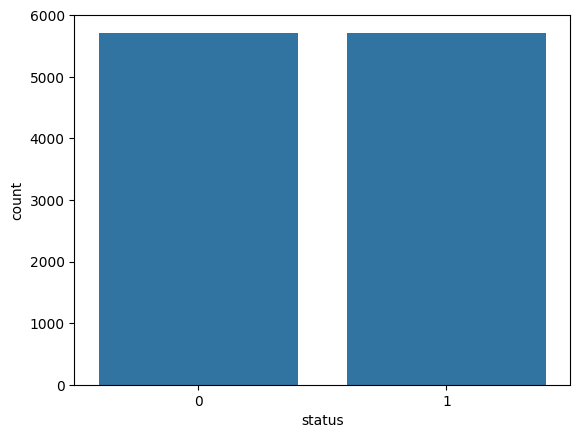

In [ ]:
sns.countplot(x="status",data=data)

# Data Visualization

In [ ]:
# data.hist(bins=31,figsize=(20,20))
# plt.show

In [ ]:
# from pandas.plotting import scatter_matrix
# scatter_matrix(data,figsize=(50,50),color='red')

### Correlation

Pearson's Correlation Coefficient : Helps you find out the relationship between two quantities. It gives you the measure of the strength of association between two variables. The value of Pearson's Correlation Coefficient can be between -1 to +1. 1 means that they are highly correlated and 0 means no correlation.

A heat map is a two-dimensional representation of information with the help of colors. Heat maps can help the user visualize simple or complex information.

In [ ]:
# data.corr()

### Heatmap of correlation

In [ ]:
# plt.figure(figsize=(20,20))
# sns.heatmap(data.corr(), annot = True)
# plt.show()

In [ ]:
data.columns

Index(['length_url', 'length_hostname', 'ip', 'nb_dots', 'nb_hyphens', 'nb_at',
       'nb_qm', 'nb_and', 'nb_underscore', 'nb_percent', 'nb_slash',
       'nb_colon', 'nb_comma', 'nb_semicolumn', 'nb_dollar', 'nb_space',
       'nb_www', 'nb_com', 'http_in_path', 'https_token', 'ratio_digits_url',
       'ratio_digits_host', 'tld_in_path', 'tld_in_subdomain', 'nb_subdomains',
       'prefix_suffix', 'random_domain', 'shortening_service',
       'nb_redirection', 'length_words_raw', 'char_repeat',
       'shortest_words_raw', 'shortest_word_host', 'shortest_word_path',
       'longest_words_raw', 'longest_word_host', 'avg_words_raw',
       'avg_word_host', 'avg_word_path', 'phish_hints', 'domain_in_brand',
       'statistical_report', 'nb_hyperlinks', 'ratio_intHyperlinks',
       'ratio_extHyperlinks', 'nb_extCSS', 'ratio_extRedirection',
       'ratio_extErrors', 'login_form', 'external_favicon', 'links_in_tags',
       'ratio_intMedia', 'ratio_extMedia', 'safe_anchor', 'empty_title

#  Split Dataset for dependent and independent Features

In [ ]:
X=data.drop(['status'],axis=1)
y=data['status']

### ExtraTreesClassifier

In [ ]:
# from sklearn.ensemble import ExtraTreesClassifier
# model = ExtraTreesClassifier()
# model.fit(X,y)
# print(model.feature_importances_)
# feat_importances = pd.Series(model.feature_importances_, index=X.columns)
# feat_importances.nlargest(60).plot(kind='bar')
# plt.show()

In [ ]:
X.head()

,length_url,length_hostname,ip,nb_dots,nb_hyphens,nb_at,nb_qm,nb_and,nb_underscore,nb_percent,...,safe_anchor,empty_title,domain_in_title,domain_with_copyright,whois_registered_domain,domain_registration_length,domain_age,web_traffic,google_index,page_rank
0,37,19,0,3,0,0,0,0,0,0,...,0.0,0,0,1,0,45,-1,0,1,4
1,77,23,1,1,0,0,0,0,0,0,...,100.0,0,1,0,0,77,5767,0,1,2
2,126,50,1,4,1,0,1,2,2,0,...,100.0,0,1,0,0,14,4004,5828815,1,0
3,18,11,0,2,0,0,0,0,0,0,...,62.5,0,1,0,0,62,-1,107721,0,3
4,55,15,0,2,2,0,0,0,0,0,...,0.0,0,0,1,0,224,8175,8725,0,6


In [ ]:
y.head()

,status
0,0
1,1
2,1
3,0
4,0


# Train Test Split

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state= 42 )

## Standard Scaling

In [ ]:
from sklearn.preprocessing import StandardScaler
st=StandardScaler()
X_train=st.fit_transform(X_train)
X_test=st.transform(X_test)

# Cross Validation

In [ ]:
# from sklearn.model_selection import KFold, cross_val_score
# from sklearn.tree import DecisionTreeClassifier
# from sklearn.ensemble import RandomForestClassifier
# from sklearn.neighbors import KNeighborsClassifier
# from sklearn.linear_model import LogisticRegression
# from sklearn.svm import SVC

# models ={
#     'Decision Tree':DecisionTreeClassifier(),
#     'Random Forest': RandomForestClassifier(),
#     'KNN': KNeighborsClassifier(),
#     'Logistic Regression': LogisticRegression(),
#     'SVM' : SVC()
# }
# k_fold = KFold(n_splits = 7, shuffle=True, random_state = 42)

# for model_name, model in models.items():
#     cross_score = cross_val_score(model, X, y, cv=k_fold)
#     print(f"--------------------------------------------------------")
#     print(f"{model_name}:\n")
#     print(f"Cross Validation Score for each fold:{cross_score}\n")
#     print(f"Average Cross Validation Score: {cross_score.mean()}\n")
#     print(f"--------------------------------------------------------")

# Classification Algorithm

### Support Vector Machine

In [ ]:
from sklearn.svm import SVC
from imblearn.metrics import geometric_mean_score
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score, roc_curve, auc, roc_auc_score
sv=SVC(probability=True, random_state = 42)
sv.fit(X_train,y_train)
y_pred_sv = sv.predict(X_test)
sv_acc = accuracy_score(y_test, y_pred_sv)
print(f'SVM Accuracy: {sv_acc:.4f}')
g_mean = geometric_mean_score(y_test, y_pred_sv)
print("Geometric Mean Score:", g_mean)
auc_score = roc_auc_score(y_test,y_pred_sv)
print(f"AUC Score: {auc_score:.4f}")
print(classification_report(sv.predict(X_test),y_test))

SVM Accuracy: 0.9654
Geometric Mean Score: 0.9653476273231675
AUC Score: 0.9654
              precision    recall  f1-score   support

           0       0.97      0.96      0.97      1170
           1       0.96      0.97      0.96      1116

    accuracy                           0.97      2286
   macro avg       0.97      0.97      0.97      2286
weighted avg       0.97      0.97      0.97      2286



### Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression
lg=LogisticRegression()
lg.fit(X_train,y_train)
y_pred_lg = lg.predict(X_test)
lg_acc = accuracy_score(y_test, y_pred_lg)
print(f'Logistic regression Accuracy: {lg_acc:.4f}')
g_mean = geometric_mean_score(y_test, y_pred_lg)
print("Geometric Mean Score:", g_mean)
auc_score = roc_auc_score(y_test,y_pred_lg)
print(f"AUC Score: {auc_score:.4f}")
print(classification_report(lg.predict(X_test),y_test))

Logistic regression Accuracy: 0.9523
Geometric Mean Score: 0.9522523406657997
AUC Score: 0.9523
              precision    recall  f1-score   support

           0       0.96      0.95      0.95      1166
           1       0.95      0.96      0.95      1120

    accuracy                           0.95      2286
   macro avg       0.95      0.95      0.95      2286
weighted avg       0.95      0.95      0.95      2286



### Decision Tree

In [ ]:
from sklearn.tree import DecisionTreeClassifier
tr=DecisionTreeClassifier()
tr.fit(X_train,y_train)
y_pred_tr = tr.predict(X_test)
tr_acc = accuracy_score(y_test, y_pred_tr)
print(f'DT Accuracy: {tr_acc:.4f}')
g_mean = geometric_mean_score(y_test, y_pred_tr)
print("Geometric Mean Score:", g_mean)
auc_score = roc_auc_score(y_test,y_pred_tr)
print(f"AUC Score: {auc_score:.4f}")

print(classification_report(tr.predict(X_test),y_test))

DT Accuracy: 0.9296
Geometric Mean Score: 0.9295956449987384
AUC Score: 0.9296
              precision    recall  f1-score   support

           0       0.93      0.93      0.93      1150
           1       0.93      0.93      0.93      1136

    accuracy                           0.93      2286
   macro avg       0.93      0.93      0.93      2286
weighted avg       0.93      0.93      0.93      2286



### Random forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(random_state = 42)
rfc.fit(X_train,y_train)
y_pred_rfc = rfc.predict(X_test)
rfc_acc = accuracy_score(y_test, y_pred_rfc)

print(f'Random forest Accuracy: {rfc_acc:.4f}')
g_mean = geometric_mean_score(y_test, y_pred_rfc)
print("Geometric Mean Score:", g_mean)
auc_score = roc_auc_score(y_test,y_pred_rfc)
print(f"AUC Score: {auc_score:.4f}")

print(classification_report(rfc.predict(X_test),y_test))

Random forest Accuracy: 0.9663
Geometric Mean Score: 0.966206095814136
AUC Score: 0.9662
              precision    recall  f1-score   support

           0       0.97      0.96      0.97      1172
           1       0.96      0.97      0.97      1114

    accuracy                           0.97      2286
   macro avg       0.97      0.97      0.97      2286
weighted avg       0.97      0.97      0.97      2286



### KNN

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
y_pred_knn = knn.predict(X_test)
knn_acc = accuracy_score(y_test, y_pred_knn)
print(f'KNN Accuracy: {knn_acc:.4f}')

g_mean = geometric_mean_score(y_test, y_pred_knn)
print("Geometric Mean Score:", g_mean)
auc_score = roc_auc_score(y_test,y_pred_knn)
print(f"AUC Score: {auc_score:.4f}")

print(classification_report(knn.predict(X_test),y_test))

KNN Accuracy: 0.9453
Geometric Mean Score: 0.9449624973749381
AUC Score: 0.9451
              precision    recall  f1-score   support

           0       0.96      0.93      0.95      1194
           1       0.93      0.96      0.94      1092

    accuracy                           0.95      2286
   macro avg       0.95      0.95      0.95      2286
weighted avg       0.95      0.95      0.95      2286



## XGBoost Model

In [ ]:
from xgboost import XGBClassifier
xgb = XGBClassifier(use_label_encoder=False, eval_metric='mlogloss', random_state = 42)
xgb.fit(X_train, y_train)
y_pred_xgb = xgb.predict(X_test)
xgb_acc = accuracy_score(y_test, y_pred_xgb)
print(f'XGBoost Accuracy: {xgb_acc:.4f}')

g_mean = geometric_mean_score(y_test, y_pred_xgb)
print("Geometric Mean Score:", g_mean)
auc_score = roc_auc_score(y_test,y_pred_xgb)
print(f"AUC Score: {auc_score:.4f}")
print(classification_report(xgb.predict(X_test),y_test))

/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [20:57:26] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


XGBoost Accuracy: 0.9724
Geometric Mean Score: 0.9724311419547722
AUC Score: 0.9724
              precision    recall  f1-score   support

           0       0.97      0.97      0.97      1158
           1       0.97      0.97      0.97      1128

    accuracy                           0.97      2286
   macro avg       0.97      0.97      0.97      2286
weighted avg       0.97      0.97      0.97      2286



## LightGBM

In [ ]:
from lightgbm import LGBMClassifier
lgbm = LGBMClassifier(verbose=-1, random_state = 42)
lgbm.fit(X_train, y_train)
y_pred_lgbm = lgbm.predict(X_test)
lgbm_acc = accuracy_score(y_test, y_pred_lgbm)
print(f'LightGBM Accuracy: {lgbm_acc:.4f}')


g_mean = geometric_mean_score(y_test, y_pred_lgbm)
print("Geometric Mean Score:", g_mean)
auc_score = roc_auc_score(y_test,y_pred_lgbm)
print(f"AUC Score: {auc_score:.4f}")
print(classification_report(lgbm.predict(X_test),y_test))


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


LightGBM Accuracy: 0.9716
Geometric Mean Score: 0.9715671425465494
AUC Score: 0.9716
              precision    recall  f1-score   support

           0       0.97      0.97      0.97      1156
           1       0.97      0.97      0.97      1130

    accuracy                           0.97      2286
   macro avg       0.97      0.97      0.97      2286
weighted avg       0.97      0.97      0.97      2286



/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


## Naive Bayes

In [ ]:
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()
nb.fit(X_train, y_train)
y_pred_nb = nb.predict(X_test)
nb_acc = accuracy_score(y_test, y_pred_nb)
print(f'Naïve Bayes Accuracy: {nb_acc:.4f}')

g_mean = geometric_mean_score(y_test, y_pred_nb)
print("Geometric Mean Score:", g_mean)
auc_score = roc_auc_score(y_test,y_pred_nb)
print(f"AUC Score: {auc_score:.4f}")

print(classification_report(nb.predict(X_test),y_test))

Naïve Bayes Accuracy: 0.7095
Geometric Mean Score: 0.6520162176188086
AUC Score: 0.7062
              precision    recall  f1-score   support

           0       0.98      0.64      0.77      1769
           1       0.43      0.95      0.60       517

    accuracy                           0.71      2286
   macro avg       0.71      0.79      0.68      2286
weighted avg       0.85      0.71      0.73      2286



### Voting classifier

In [ ]:
from sklearn.ensemble import VotingClassifier
voting_clf = VotingClassifier(estimators=[
    ('knn', knn),
    ('xgb', xgb),
    ('lgbm', lgbm),
    ('svc', sv),
    ('rfc', rfc)
], voting='soft',)

voting_clf.fit(X_train, y_train)
y_pred_voting = voting_clf.predict(X_test)
voting_acc = accuracy_score(y_test, y_pred_voting)
print(f'Voting Classifier Accuracy: {voting_acc:.4f}')

g_mean = geometric_mean_score(y_test, y_pred_voting)
print("Geometric Mean Score:", g_mean)
auc_score = roc_auc_score(y_test,y_pred_voting)
print(f"AUC Score: {auc_score:.4f}")

print(classification_report(voting_clf.predict(X_test),y_test))

/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [20:57:27] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


Voting Classifier Accuracy: 0.9751
Geometric Mean Score: 0.9750185464623982
AUC Score: 0.9750


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


              precision    recall  f1-score   support

           0       0.98      0.97      0.98      1164
           1       0.97      0.98      0.97      1122

    accuracy                           0.98      2286
   macro avg       0.98      0.98      0.98      2286
weighted avg       0.98      0.98      0.98      2286



In [ ]:
import pickle
with open('soft_AI_model.pkl', 'wb') as file:
    pickle.dump(voting_clf, file)
print("Model saved successfully!")

Model saved successfully!


In [ ]:
data.columns

Index(['length_url', 'length_hostname', 'ip', 'nb_dots', 'nb_hyphens', 'nb_at',
       'nb_qm', 'nb_and', 'nb_underscore', 'nb_percent', 'nb_slash',
       'nb_colon', 'nb_comma', 'nb_semicolumn', 'nb_dollar', 'nb_space',
       'nb_www', 'nb_com', 'http_in_path', 'https_token', 'ratio_digits_url',
       'ratio_digits_host', 'tld_in_path', 'tld_in_subdomain', 'nb_subdomains',
       'prefix_suffix', 'random_domain', 'shortening_service',
       'nb_redirection', 'length_words_raw', 'char_repeat',
       'shortest_words_raw', 'shortest_word_host', 'shortest_word_path',
       'longest_words_raw', 'longest_word_host', 'avg_words_raw',
       'avg_word_host', 'avg_word_path', 'phish_hints', 'domain_in_brand',
       'statistical_report', 'nb_hyperlinks', 'ratio_intHyperlinks',
       'ratio_extHyperlinks', 'nb_extCSS', 'ratio_extRedirection',
       'ratio_extErrors', 'login_form', 'external_favicon', 'links_in_tags',
       'ratio_intMedia', 'ratio_extMedia', 'safe_anchor', 'empty_title

### Curve for voting classifier

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


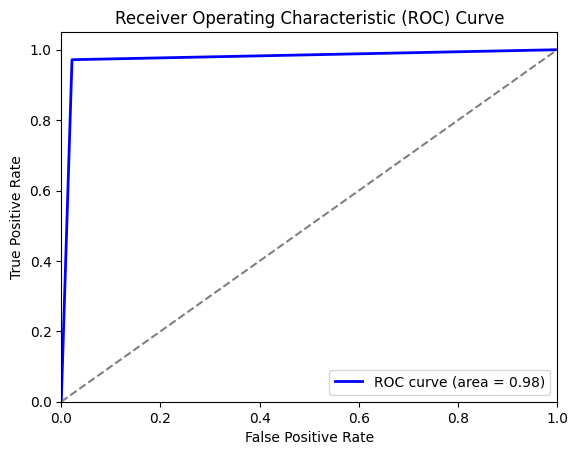

In [ ]:
from sklearn.metrics import accuracy_score, roc_curve, auc, confusion_matrix, ConfusionMatrixDisplay, classification_report, roc_auc_score
# Compute AUC Curve
fpr, tpr, _ = roc_curve(y_test, voting_clf.predict(X_test))
roc_auc = auc(fpr, tpr)

# Plot AUC Curve
plt.figure()
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

### Confusion matrix for voting classifier

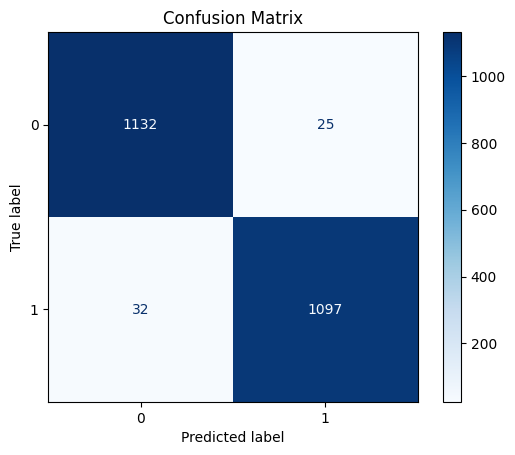

In [ ]:
conf_matrix = confusion_matrix(y_test, y_pred_voting)
disp = ConfusionMatrixDisplay(conf_matrix)
disp.plot(cmap='Blues')
plt.title('Confusion Matrix')
plt.show()

### Bar chart for different algorithm

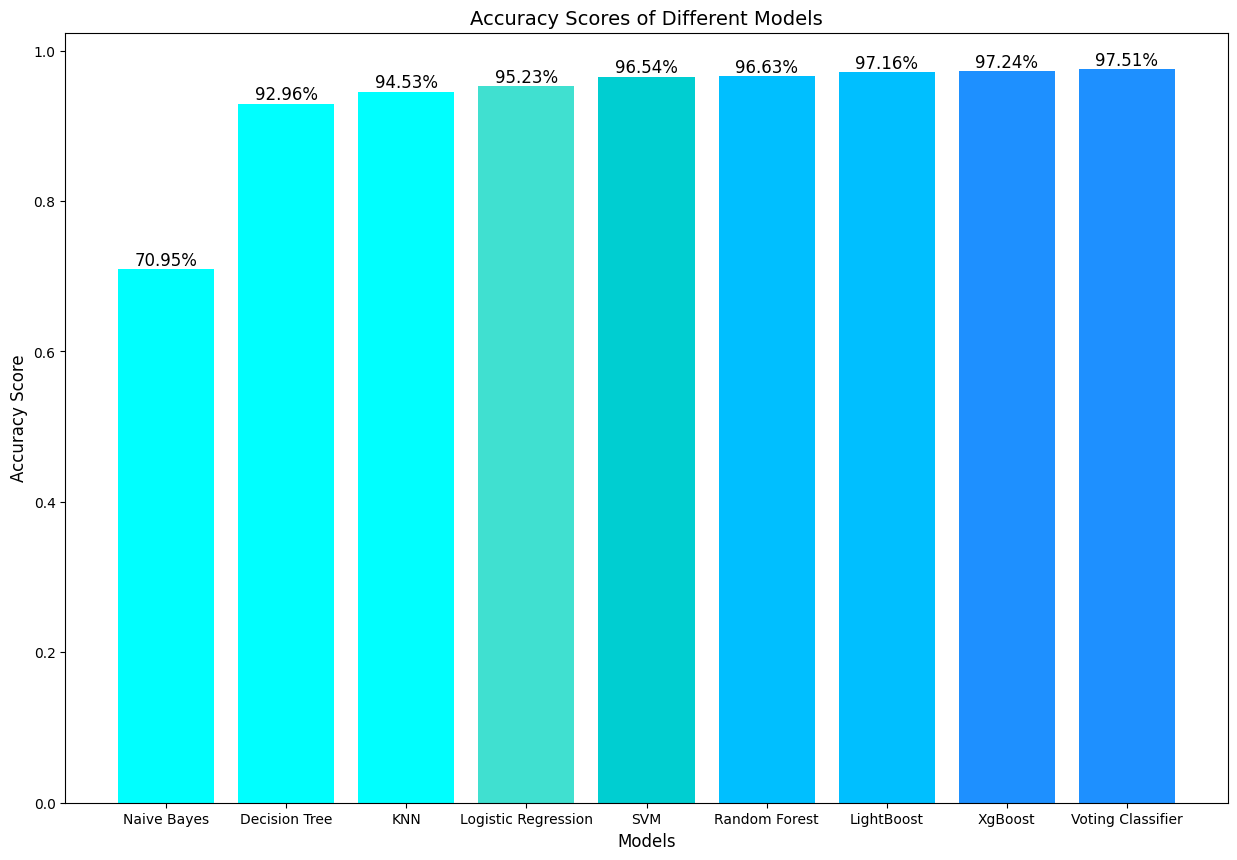

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
accuracy_scores = [
nb_acc,
tr_acc,
knn_acc,
lg_acc,
sv_acc,
rfc_acc,
lgbm_acc,
xgb_acc,
voting_acc
]

model_names = ['Naive Bayes','Decision Tree', 'KNN','Logistic Regression', 'SVM',  'Random Forest','LightBoost',  'XgBoost', 'Voting Classifier' ]

plt.figure(figsize=(15, 10))
bars = plt.bar(model_names, accuracy_scores, color=['cyan', 'aqua','aqua', 'turquoise','darkturquoise','deepskyblue','deepskyblue','dodgerblue','dodgerblue'])


plt.title('Accuracy Scores of Different Models', fontsize=14)
plt.xlabel('Models', fontsize=12)
plt.ylabel('Accuracy Score', fontsize=12)

for bar in bars:
    height = bar.get_height()
    plt.text(
        bar.get_x() + bar.get_width() / 2.0,
        height,
        f'{height:.2%}',
        ha='center', va='bottom', fontsize=12
    )

plt.show()


In [ ]:
data.shape


(11430, 64)